# Multi-layer Perceptron
Multi-layer Perceptron (MLP) can be thought of as Artifical Neural Network (ANN) model which is composed of multiple layer of perceptron. A MLP consists of at least three layers: the input layer, one hidden layer and the output layer. There can be more than one hidden layer. Except the input layer, each layer can be though of as a composition of linear transformation of the previous layer's output and a element-wise nonlinear function. The element-wise nonlinear function is called activation function. Thus, the output of an $l+1$ layer MLP for input $\mathbf{x}$ can be given by
$$
\begin{align}
\mathbf{h}_1 &= \sigma_1(\mathrm{W}_1\mathbf{x}+\mathbf{b}_1)\\
\mathbf{h}_2 &= \sigma_2(\mathrm{W}_2\mathbf{h}_1+\mathbf{b}_2)\\
\cdots\\
\hat{\mathbf{y}} &= \sigma_{l}(\mathrm{W}_{l}\mathbf{h}_{l-1}+\mathbf{b}_{l})\\
\end{align}
$$
where $\mathrm{W}_i\in\mathbb{R}^{d_{i}\times d_{i-1}} \text{ and } \mathbf{b}_i\in\mathbb{R}^{d_i}$ are the parameters (i.e. coefficient and intercept) of the $i$-th layer and $\sigma_i$ is the activation function for the i-th layer. Here $d_0=d$ is the input dimension, $d_i, i=1, \ldots, l-1$ is the dimension of the $i$-th hidden layer and $d_l$ is the output dimension. An MLP is trained by minimizing a suitable loss over the dataset $\{(\mathbf{x}_0, y_0), (\mathbf{x}_1, y_1), \ldots, (\mathbf{x}_{n-1}, y_{n-1})\}$:
$$\underset{\{\mathrm{W}_i, \mathbf{b}_i\}_{i}}{\text{min}}\quad \sum_{i=0}^{n-1} Loss(y_i, \hat{\mathbf{y}}_i) + \alpha\sum_{i=1}^l R(\mathrm{W}_i)$$
where $\mathbf{y}_i$ is the output of the MLP for the input $\mathbf{x}_i$, $Loss(\cdot, \cdot)$ is a suitable loss function and $R(\cdot)$
is a penalty function.

# Classification using MLP
For classification, the last activation function i.e. $\sigma_l$ is generally chosen to be the logistic function (for binary classification)
or the softmax function (for multiclass classification). And the negative
log-likelihood loss (or cross-entropy loss) is generally chosen as
the loss function. Scikit-learn provides the class <em>sklearn.neural_network.MLPClassifier</em> for performing classification
using MLP. The complete documentation of the same can be found
[here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier).

## Classification example

### Importing the python modules

In [1]:
from sklearn.neural_network import MLPClassifier      # For MLP classifier
from sklearn.datasets import make_classification      # For creating dataset
from sklearn.preprocessing import StandardScaler      # For preprocessing the dataset
from sklearn.model_selection import train_test_split  # For deviding the dataset into train and test splits
import matplotlib.pyplot as plt                       # For plotting
import numpy as np                                    # For using numpy library

### Creating the dataset

In [2]:
X, y = make_classification(
    n_features=100, n_redundant=90, n_informative=10, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 20 * rng.uniform(size=X.shape)

### Preprocessing and train-test split

In [3]:
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
print(X_train.shape)
print(X_test.shape)

(80, 100)
(20, 100)


### Training the MLP classifier

In [5]:
clf = MLPClassifier(alpha=1e-2,
                    hidden_layer_sizes=(500, 500),
                    activation='relu', #[‘identity’, ‘logistic’, ‘tanh’, ‘relu’]
                    max_iter=5000,
                    tol=1e-6,
                    random_state=1)
clf.fit(X_train, y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(500, 500), max_iter=5000,
              random_state=1, tol=1e-06)

### Prediction by the trained classifier

In [6]:
clf.predict(X_test[:10])

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [7]:
clf.predict_proba(X_test[:5])

array([[8.19134434e-04, 9.99180866e-01],
       [2.41174156e-04, 9.99758826e-01],
       [2.65597338e-05, 9.99973440e-01],
       [9.32981498e-03, 9.90670185e-01],
       [3.66797908e-02, 9.63320209e-01]])

In [8]:
clf.score(X_test, y_test)

0.95

### Viewing the parameters

In [9]:
[coef.shape for coef in clf.coefs_]

[(100, 500), (500, 500), (500, 1)]

In [10]:
[intercept.shape for intercept in clf.intercepts_]

[(500,), (500,), (1,)]

### Plotting the loss curve

In [11]:
clf.loss_

0.0011626299129504775

In [12]:
clf.best_loss_

0.0011626299129504775

In [13]:
print(len(clf.loss_curve_))
print(clf.loss_curve_[-5:])

2047
[0.001166534628416488, 0.0011655539791835924, 0.0011645764803406475, 0.0011635994094371367, 0.0011626299129504775]


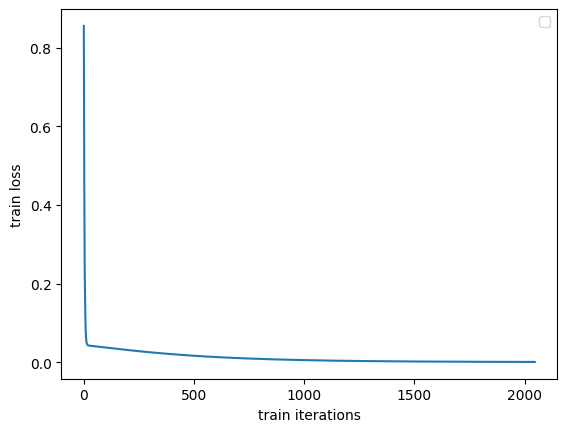

In [14]:
plt.plot(clf.loss_curve_)
plt.legend()
plt.xlabel('train iterations')
plt.ylabel('train loss')
plt.show()

## Nonlinear Classification using MLP

### Importing the necessary packages

In [20]:
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

### Creating the datasets

Generate a linearly seperable dataset

In [19]:
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

Also take some non-linear datasets with the linearly seperable dataset

In [18]:
datasets = [
    linearly_separable,
    make_moons(noise=0.2, random_state=0),
    make_circles(noise=0.15, factor=0.5, random_state=1),
]
names = ['linear', 'moon shaped', 'circle shaped']

# Let us plot the datasets

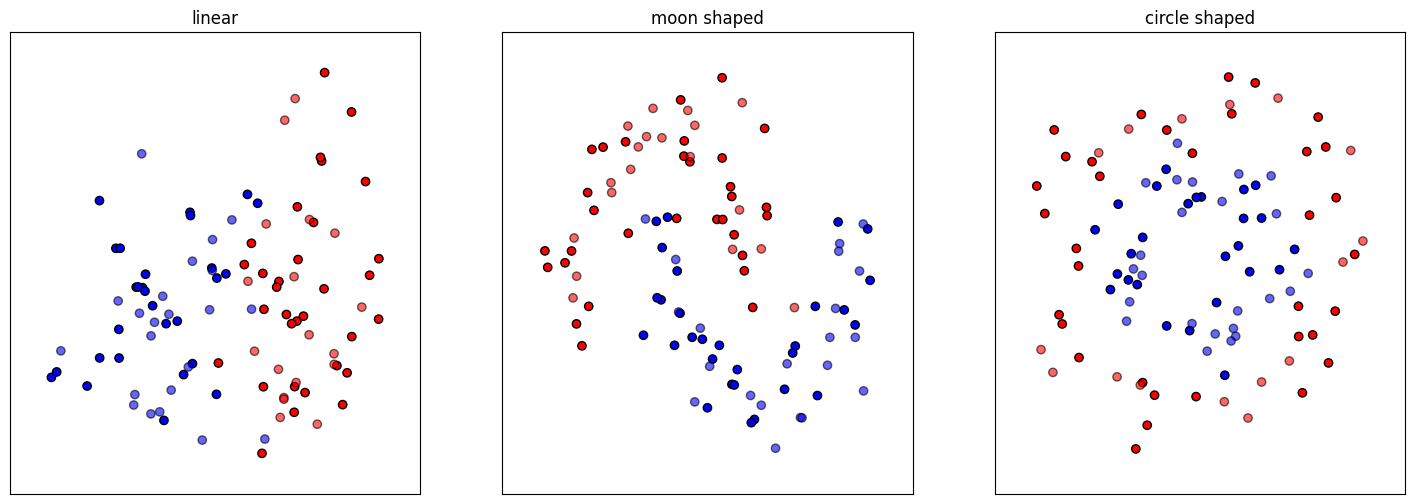

In [21]:
figure = plt.figure(figsize=(18, 6))
i = 1
for ds_cnt, (name, ds) in enumerate(zip(names, datasets)):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.mgrid[x_min:x_max:(x_max-x_min)/100, y_min:y_max:(y_max-y_min)/100.]
    grid = np.c_[xx.ravel(), yy.ravel()]

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(1, len(datasets), i)
    ax.set_title(name)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    #ax.set_aspect(.6)
    i += 1

### Defining the classifiers

In [22]:
names = [
    "Two Layer MLP",
    "Three Layer MLP",
    "Four Layer MLP",
    "Five Layer MLP",
]

classifiers = [
    MLPClassifier(alpha=1, hidden_layer_sizes=[], max_iter=5000),
    MLPClassifier(alpha=1, hidden_layer_sizes=[10], max_iter=5000),
    MLPClassifier(alpha=1, hidden_layer_sizes=[10, 10], max_iter=5000),
    MLPClassifier(alpha=1, hidden_layer_sizes=[10, 10, 10], max_iter=5000),
]

### Plot the Classification bounderies of the classifiers

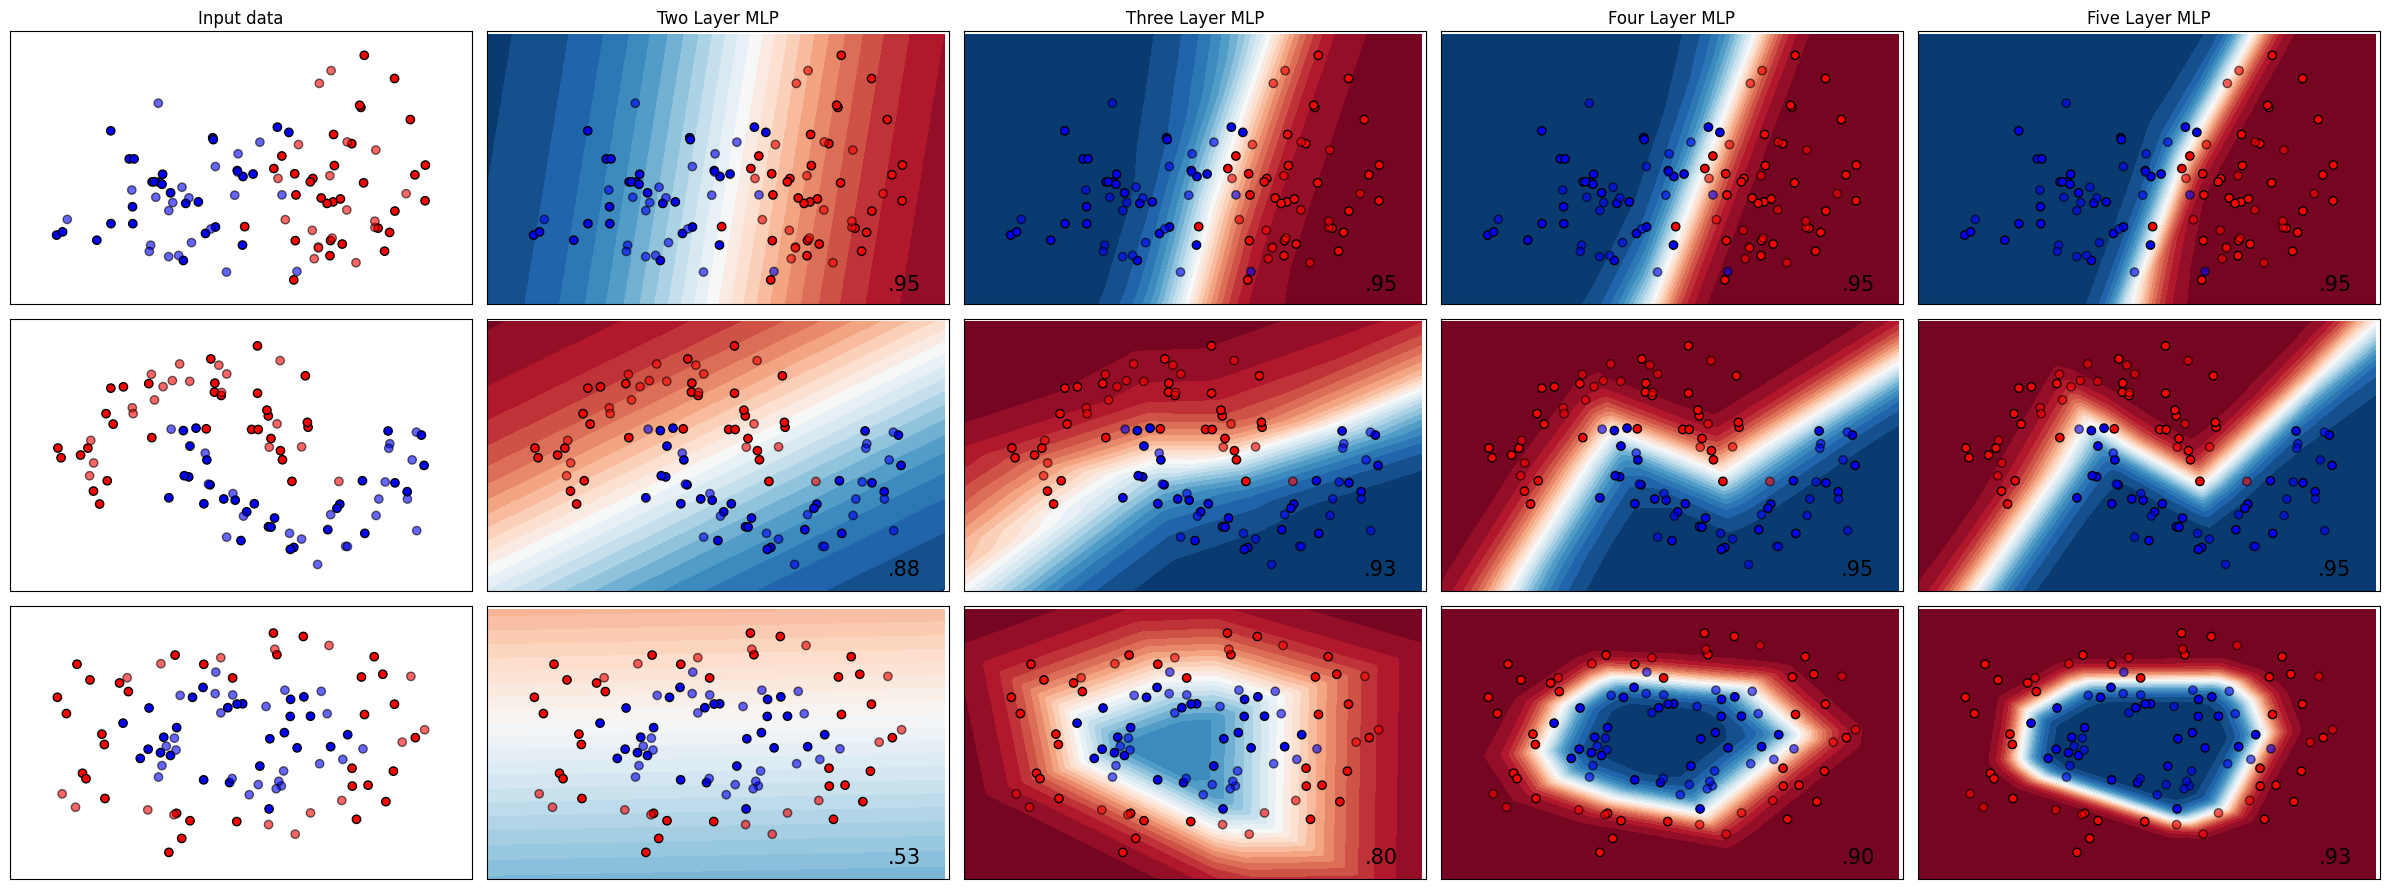

In [23]:
figure = plt.figure(figsize=(24, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.mgrid[x_min:x_max:(x_max-x_min)/100, y_min:y_max:(y_max-y_min)/100.]
    grid = np.c_[xx.ravel(), yy.ravel()]

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    #ax.set_aspect(.6)
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
        ax.contourf(xx, yy, probs, levels=25, cmap=cm, vmin=0, vmax=1)
        #ax.set_aspect(.6)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

## Comparison with other Classifier
The following code snippet is modified version of [this code](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py).

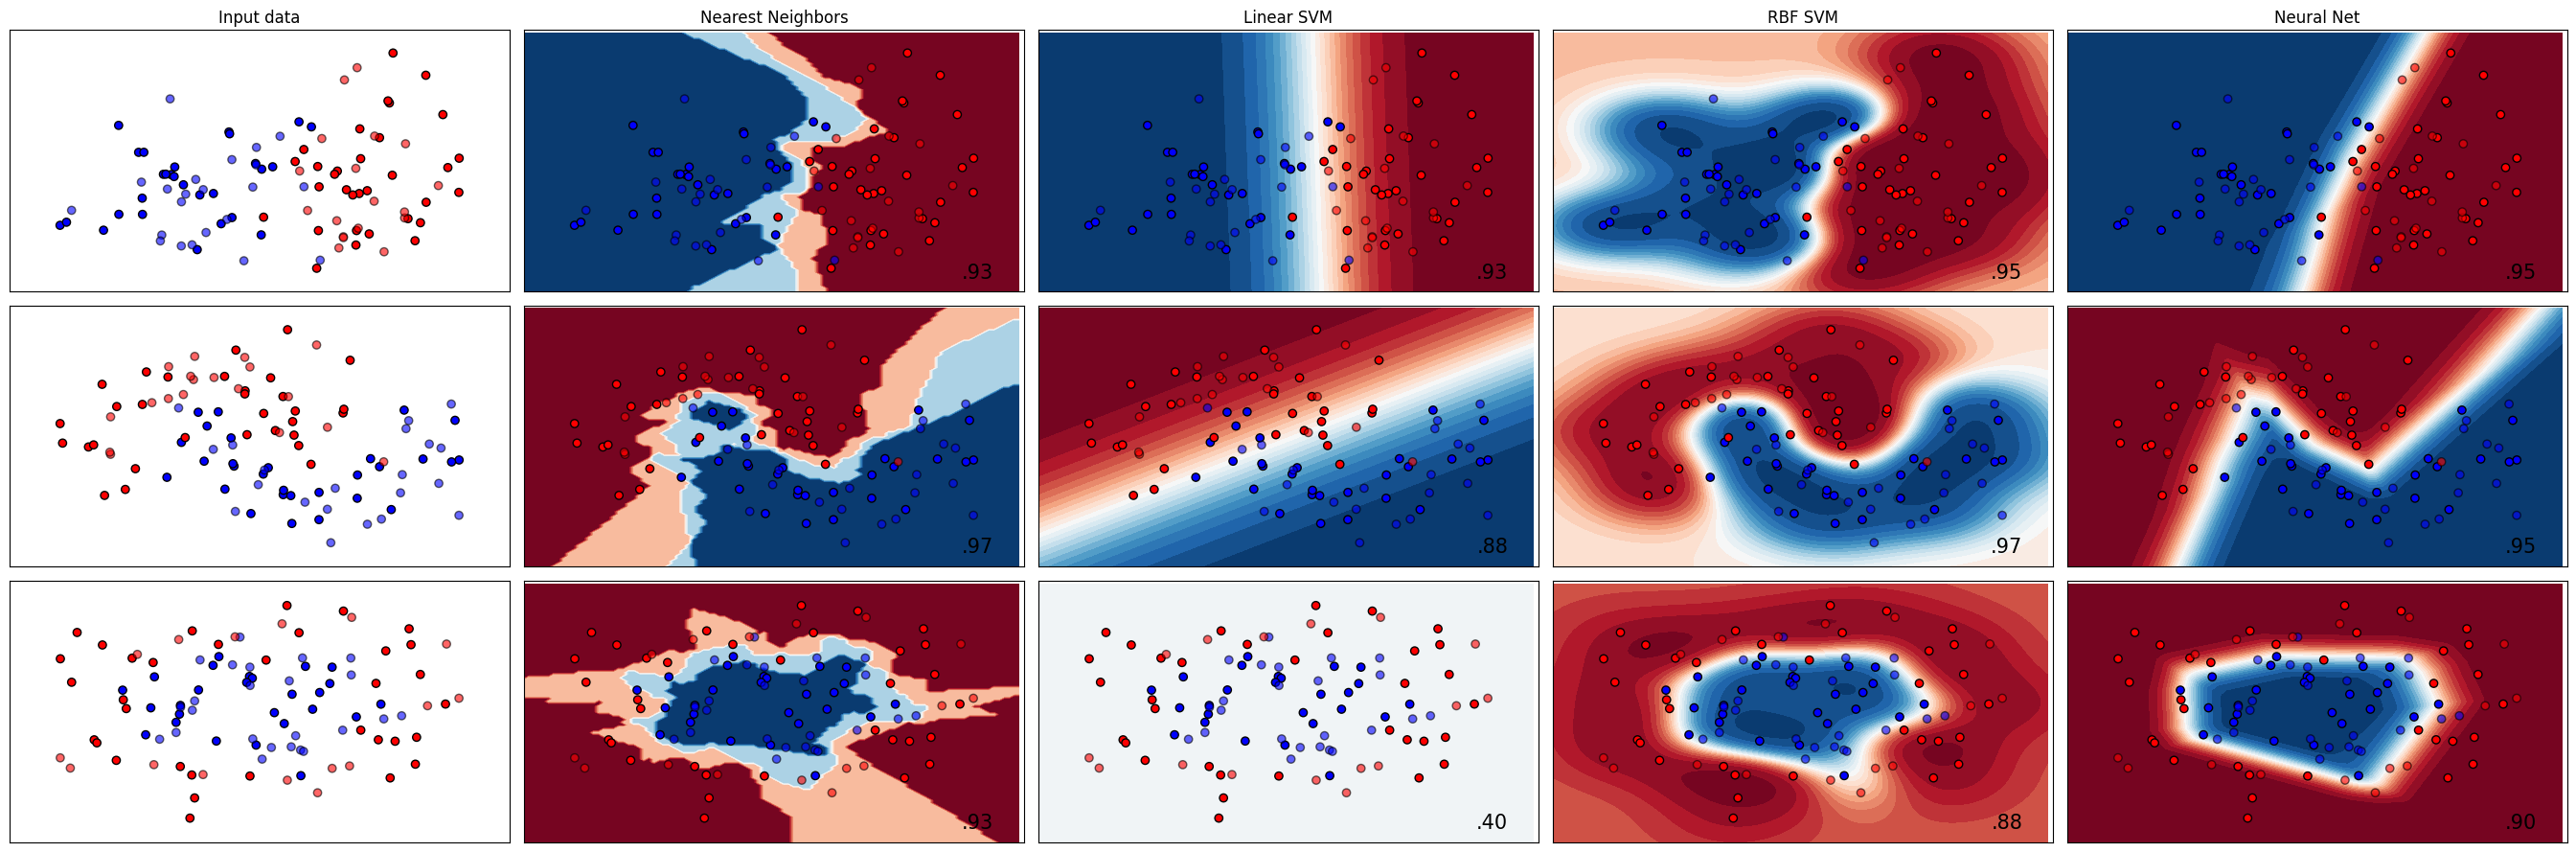

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Neural Net",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, probability=True),
    SVC(gamma=2, C=1, probability=True),
    MLPClassifier(alpha=1, hidden_layer_sizes=[20, 20, 20], max_iter=5000),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    linearly_separable,
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.mgrid[x_min:x_max:(x_max-x_min)/100, y_min:y_max:(y_max-y_min)/100.]
    grid = np.c_[xx.ravel(), yy.ravel()]

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    #ax.set_aspect(.6)
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
        ax.contourf(xx, yy, probs, levels=25, cmap=cm, vmin=0, vmax=1)
        #ax.set_aspect(.6)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

# Regression using MLP
For performing regression using MLP, the identity activation function
is generally chosen to be the last layer's activation function ($\sigma_l$)
and a regression loss like MSE is chosen as the loss function.
The Scikit-learn provide the class <em>sklearn.neural_network.MLPRegressor</em> for performing regression using MLP. The complete documentation of the same can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor).

## Example of Regression using MLP
The original code can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor).

### Importing the necessary modules

In [25]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

### Creating the dataset

In [26]:
X, y = make_regression(n_samples=200, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Training the MLP regressor

In [27]:
regr = MLPRegressor(random_state=1,
                    hidden_layer_sizes=(100,),
                    activation='relu',
                    alpha=0.0001,
                    early_stopping=False,
                    max_iter=2000)
regr.fit(X_train, y_train)

MLPRegressor(max_iter=2000, random_state=1)

### Prediction using the trained model

In [28]:
regr.predict(X_test[:5])

array([  8.69448846,   6.5006531 , -24.42285305, -50.05787926,
        53.6490256 ])

In [29]:
regr.score(X_test, y_test)

0.5209157440819883

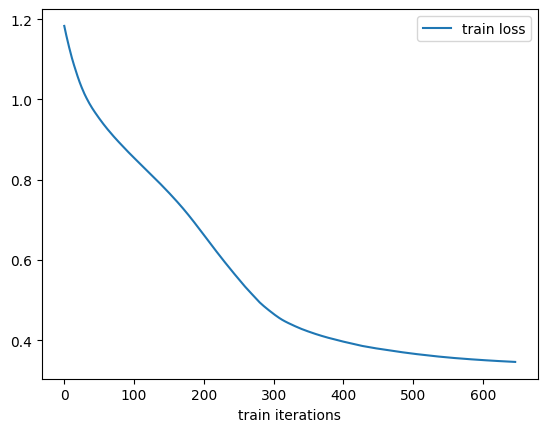

In [30]:
plt.plot(clf.loss_curve_, label='train loss')
plt.legend()
plt.xlabel('train iterations')
plt.show()

## Nonlinear regression using MLP

### Data Generation

In [31]:
def f(x):
    """Function to be approximated by polynomial interpolation."""
    return x * np.sin(x)

# whole range we want to plot
x_plot = np.linspace(-1, 11, 100)

x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
X = np.sort(rng.choice(x, size=30, replace=False))
y = f(X)

# create 2D-array versions of these arrays to feed to transformers
X = X[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

### Plotting Data

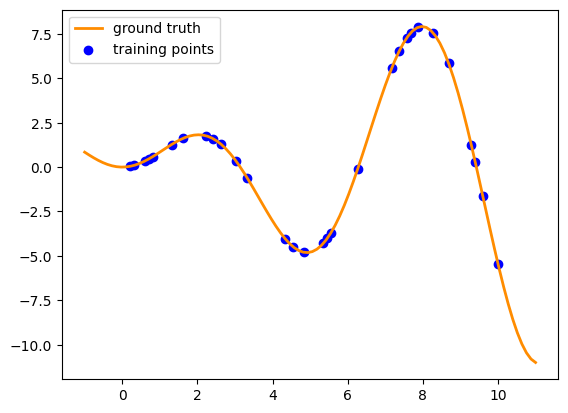

In [32]:
plt.plot(x_plot, f(x_plot), linewidth=2, color="darkorange", label="ground truth")
plt.scatter(X, y, color="b", label="training points")
plt.legend(loc="best")
plt.show()

### Performing Regression on the data

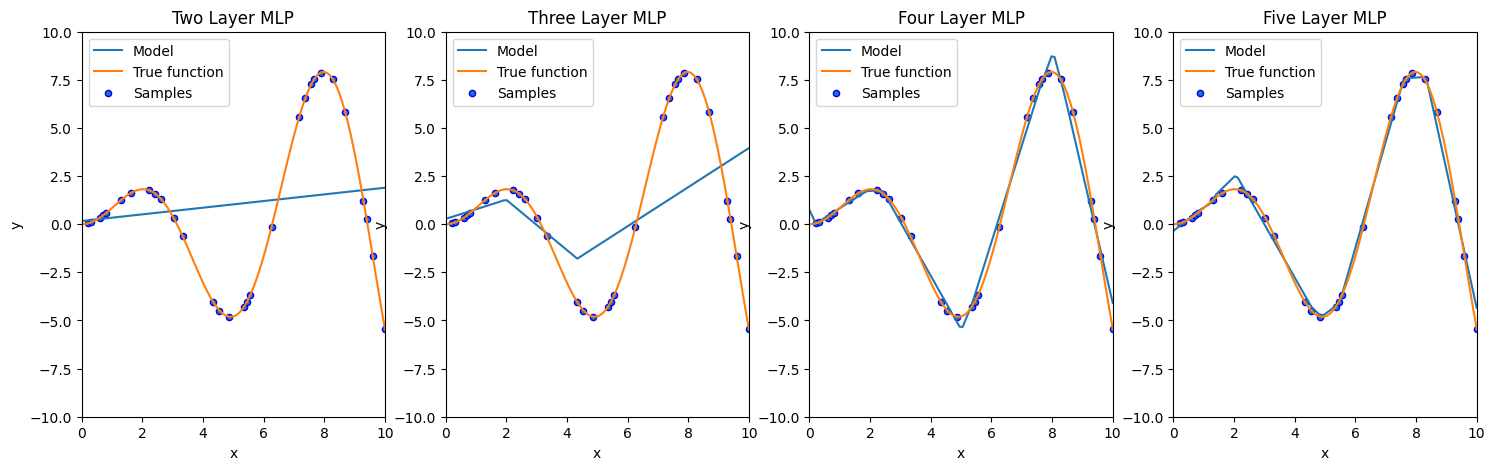

In [33]:
from matplotlib.colors import ListedColormap

names = [
    "Two Layer MLP",
    "Three Layer MLP",
    "Four Layer MLP",
    "Five Layer MLP",
]

regressors = [
    MLPRegressor(alpha=1, hidden_layer_sizes=[], max_iter=10000, random_state=1),
    MLPRegressor(alpha=1, hidden_layer_sizes=[10], max_iter=10000, random_state=1),
    MLPRegressor(alpha=1, hidden_layer_sizes=[10, 10], max_iter=10000, random_state=1),
    MLPRegressor(alpha=1, hidden_layer_sizes=[10, 10, 10], max_iter=10000, random_state=1),
]

plt.figure(figsize=(18, 5))
# iterate over regressors
for i, (name, reg) in enumerate(zip(names, regressors)):
    ax = plt.subplot(1, len(regressors), i+1)
    reg.fit(X, y)

    X_test = np.linspace(0, 10, 100)
    plt.plot(X_test, reg.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, f(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 10))
    plt.ylim((-10, 10))
    plt.legend(loc="best")
    plt.title(name)

plt.show()

# Hyper-parameter Tuning

### Importing the necessary modules

In [ ]:
from sklearn.metrics import log_loss

### Creating a dataset

In [ ]:
X, y = make_classification(
    n_features=100, n_redundant=90, n_informative=10, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 20 * rng.uniform(size=X.shape)

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
train_loss = []
test_loss = []
alpha_list = []
for alp in range(0, 11):
  alpha = 5**-(alp-2)
  clf = MLPClassifier(alpha=alpha,
                      hidden_layer_sizes=[200, 200, 200, 200],
                      max_iter=5000,
                      random_state=1)
  clf.fit(X_train, y_train)

  pred_train = clf.predict(X_train)
  pred_test = clf.predict(X_test)

  tr_loss = log_loss(y_train, pred_train)
  te_loss = log_loss(y_test, pred_test)

  alpha_list.append(alpha)
  train_loss.append(tr_loss)
  test_loss.append(te_loss)

plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')

plt.legend()
plt.xlabel('alpha')
xt = np.array(range(0, len(alpha_list), 2))
xt_lbl = np.array(alpha_list)[xt]
plt.xticks(xt, xt_lbl)

plt.show()